### Quantum Phase Estimation
Let $U$ be a unitary operator acting on an $m$-qubit register. Thus if $|\psi\rangle$ is an eigenvector of $U$, then $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$ for some $\theta \in \mathbb{R}$. Due to the periodicity of the complex exponential, we can always assume $0 \leq \theta<1$. However in the given homework the eigenvalue equation is $U|\psi\rangle=e^{i \theta}|\psi\rangle$ and $0 \leq \theta<2\pi$. So to keep consistency I will use $U|\psi\rangle=e^{2 \pi i \frac{\theta}{2\pi}}|\psi\rangle$, where $0 \leq \theta<2\pi$ and $0 \leq \frac{\theta}{2\pi}<1$. The algorithm returns an approximation for $\theta$, with high probability.

### Mathematical Development
<img src="qpe.jpg" style="object-fit:contain;
            width:600px;
            height:300px;
            border: solid 1px" />

The input consists of two registers : the upper $t$ qubits comprise the first register, and the lower $m$ qubits are the second register. The initial state of the system is: $|0\rangle^{\otimes t}|\psi\rangle$. After applying $t$-bit Hadamard gate operation $H^{\otimes t}$ on the first register, the state becomes:
\begin{equation}
|\phi_1\rangle = \frac{1}{2^{\frac{t}{2}}}(|0\rangle+|1\rangle)^{\otimes t}|\psi\rangle=\frac{1}{2^{t / 2}} \sum_{j=0}^{2^{t}-1}|j\rangle|\psi\rangle .
\end{equation}

Here j is decimal equivalent of t-bit binary number for example $|2\rangle = |00...010\rangle$.

Let $U$ be a unitary operator with eigenvector $|\psi\rangle$ such that $U|\psi\rangle=e^{2 \pi i \frac{\theta}{2\pi}}|\psi\rangle$. Thus, $U^{2^{j}}|\psi\rangle=e^{2 \pi i \frac{2^{j}\theta}{2\pi}}|\psi\rangle$.

The transformation implemented on the two registers by the controlled gates applying $U, U^{2}, U^{2^{2}}, \ldots, U^{2^{t-1}}$ is $|k\rangle|\psi\rangle \mapsto|k\rangle U^{k}|\psi\rangle$

Let us see what happens to the first register when we apply controlled U operation on each qubit.

$$ 
U^{2^{j}}H|0\rangle|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle U^{2^{j}}|\psi\rangle + |1\rangle U^{2^{j}}|\psi\rangle) = \frac{1}{\sqrt{2}}(|0\rangle |\psi\rangle + e^{2 \pi i \frac{2^{j}\theta}{2\pi}}|1\rangle |\psi\rangle) =  \frac{1}{\sqrt{2}}(|0\rangle  + e^{2 \pi i \frac{2^{j}\theta}{2\pi}}|1\rangle)\otimes |\psi\rangle
$$ 

So if we take the whole register the output after controlled-U operations will be the following:

\begin{equation} 
|\phi_2\rangle = \frac{1}{\sqrt{2}}(|0\rangle  + e^{2 \pi i \frac{2^{t-1}\theta}{2\pi}}|1\rangle)\otimes \frac{1}{\sqrt{2}}(|0\rangle  + e^{2 \pi i \frac{2^{t-2}\theta}{2\pi}}|1\rangle)\otimes...\otimes \frac{1}{\sqrt{2}}(|0\rangle  + e^{2 \pi i \frac{2^{1}\theta}{2\pi}}|1\rangle)\otimes \frac{1}{\sqrt{2}}(|0\rangle  + e^{2 \pi i \frac{2^{0}\theta}{2\pi}}|1\rangle)\otimes |\psi\rangle
\end{equation} 

This expression of $|\phi_2\rangle$ is equivalent to $\frac{1}{\sqrt{2^{t}}} \sum_{j=0}^{2^{t}-1} e^{2 \pi i j \frac{\theta}{2\pi}}|j\rangle|\psi\rangle$ where j is decimal equivalent of binary bitstring. 

### Quantum Fourier Transform


First let us understand what quantum fourier transform does to a quantum circuit. 
\begin{equation}
QFT|x\rangle = \frac{1}{2^{\frac{t}{2}}} \sum_{y=0}^{2^{t}-1} e^{2 \pi i\frac{xy}{2^{t}}}|y\rangle 
\end{equation}
This y is also decimal equivalent of binary number and t is umber of qubits. It is easy to get that $QFT|0\rangle = |+\rangle$ and $QFT|1\rangle = |-\rangle$ which means basically operating on a single qubit state it acts like an hadamard operation or you could say transform computational basis to fourier basis. Now we will see if instead of 1-qubit $|0\rangle$ state, we have a t-qubit state how QFT transforms the circuit. We can convert decimal y into binary y i.e $|y\rangle = |y_1y_2y_3...y_t\rangle$ using $y = 2^{t-1}y_1 + 2^{t-2}y_2 +...+ 2^{0}y_t = \sum_{k=1}^{t} y_k2^{t-k}$. 
Now lets break down: 
$$
QFT|x\rangle = \frac{1}{2^{\frac{t}{2}}} \sum_{y=0}^{2^{t}-1} e^{2 \pi ix(\sum_{k=1}^{t} y_k2^{t-k})\frac{1}{2^{t}}}|y_1y_2y_3...y_t\rangle
$$

$$
 = \frac{1}{2^{\frac{t}{2}}} \sum_{y_1=0}^{1}\sum_{y_2=0}^{1}...\sum_{y_t=0}^{1} \prod_{k=1}^{t} e^{2 \pi ixy_{k}2^{t-k}\frac{1}{2^{t}}}|y_1y_2y_3...y_t\rangle
$$

$$
 = \frac{1}{2^{\frac{t}{2}}} \prod_{k=1}^{t}\sum_{y_1=0}^{1}\sum_{y_2=0}^{1}...\sum_{y_t=0}^{1} e^{2 \pi i\frac{xy_{k}}{2^{k}}}|y_1y_2y_3...y_t\rangle
$$

$$
 = \frac{1}{2^{\frac{t}{2}}} \prod_{k=1}^{t}\left[\sum_{y_1=0}^{1}\sum_{y_2=0}^{1}...\sum_{y_t=0}^{1} |y_1\rangle |y_2\rangle |y_3\rangle...|y_t\rangle e^{2 \pi i\frac{xy_{k}}{2^{k}}}\right]
$$

$$
 = \frac{1}{2^{\frac{t}{2}}}\left(\sum_{y_1=0}^{1} e^{2 \pi i\frac{xy_{1}}{2^{1}}}|y_1\rangle\right)\left(\sum_{y_2=0}^{1} e^{2 \pi i\frac{xy_{2}}{2^{2}}}|y_2\rangle\right)...\left(\sum_{y_t=0}^{1} e^{2 \pi i\frac{xy_{t}}{2^{t}}}|y_t\rangle\right) 
$$

\begin{equation}
=  \frac{1}{2^{\frac{t}{2}}}\left(|0\rangle  + e^{2 \pi i\frac{x}{2^{1}}}|1\rangle\right)\left(|0\rangle  + e^{2 \pi i\frac{x}{2^{2}}}|1\rangle\right)...\left(|0\rangle  + e^{2 \pi i\frac{x}{2^{t}}}|1\rangle\right)
\end{equation}

Now we know that QFT is an unitary operation, meaning by pushing in the output of QFT operation as the input of $QFT^{-1}$, we can get our input state of the QFT. Before I go into inverse quantum Fourier transform, I want to show similarity between Eqn(2) and Eqn(4) if we express the phase in binary format.\\
For Eqn(4) lets express x in binary $x = x_1x_2x_3...x_t$. We calculate
\begin{equation*}
\frac{x}{2^t} = \frac{1}{2^t}\left(x_12^{t-1}+x_22^{t-2}+...+x_t2^0\right) 
= \frac{x_1}{2^1}+\frac{x_2}{2^2}+...+\frac{x_t}{2^t}
\end{equation*}
$$
= 0.x_1+0.0x_2+0.00x_3+...+0.00..0x_t = 0.x_1x_2x_3...x_t
$$ 
Now we apply this on complex exponential and see what happens :
$$
e^{2\pi i\frac{x}{2^1}}= e^{2\pi i(x_1x_2x_3...x_{t-1}.x_t)} = e^{2\pi i(x_1x_2x_3...x_{t-1})}e^{2\pi i(0.x_t)} = e^{2\pi i(0.x_t)}
$$
This happen because $x_1x_2x_3...x_{t-1}$ in decimal is an integer and $e^{2\pi ni}=1$ if n is integer. Similarly we have
$$
e^{2\pi i\frac{x}{2^{2}}} = e^{2\pi i(0.x_{t-2}x_t)} \hspace{1cm}; \hspace{1cm} e^{2\pi i\frac{x}{2^{t-1}}}=e^{2\pi i(0.x_2x_3...x_t)}
$$
So we can rewrite Eqn(4) by using the above expressions:
\begin{equation}
=  \frac{1}{2^{\frac{t}{2}}}\left(|0\rangle  + e^{2\pi i(0.x_t)}|1\rangle\right)\left(|0\rangle  + e^{2\pi i(0.x_{t-1}x_t)}|1\rangle\right)...\left(|0\rangle  + e^{2\pi i(0.x_1x_2x_3...x_t)}|1\rangle\right)
\end{equation}
Now if we look at Eqn(2) $\frac{\theta}{2\pi}$ is in binary $0.\theta_1\theta_2...\theta_t$ meaning $2^{t-1}\times0.\theta_1\theta_2...\theta_t = \theta_1\theta_2...\theta_{t-1}.\theta_t$. So we can rewrite the equation as 
$$
|\phi_2\rangle = \frac{1}{\sqrt{2}}(|0\rangle + e^{2\pi i (\theta_1\theta_2...\theta_{t-1}.\theta_t)}|1\rangle)\otimes \frac{1}{\sqrt{2}}(|0\rangle  + e^{2\pi i (\theta_1\theta_2...\theta_{t-2}.\theta_{t-1}\theta_t)}|1\rangle)\otimes...\otimes \frac{1}{\sqrt{2}}(|0\rangle  + e^{2\pi i (0.\theta_1\theta_2...\theta_t)}|1\rangle)\otimes |\psi\rangle
$$
\begin{equation}
|\phi_2\rangle = \frac{1}{2^{\frac{t}{2}}}\left(|0\rangle + e^{2\pi i (0.\theta_t)}|1\rangle\right)\otimes \left(|0\rangle  + e^{2\pi i (0.\theta_{t-1}\theta_t)}|1\rangle\right)\otimes...\otimes \left(|0\rangle  + e^{2\pi i (0.\theta_1\theta_2...\theta_t)}|1\rangle\right)\otimes |\psi\rangle
\end{equation}
As this Eqn(6) is similar to Eqn(5), this is the reason that after using $|\phi_2\rangle$ as input of $QFT^{-1}$ we will get output $0.\theta_1\theta_2...\theta_t$, thus our phase will be determined. \\Now we can use inverse QFT on $|\phi_2\rangle = \frac{1}{\sqrt{2^{t}}} \sum_{j=0}^{2^{t}-1} e^{2 \pi i j \frac{\theta}{2\pi}}|j\rangle|\psi\rangle$
\begin{equation}
QFT^{-1}|j\rangle = \frac{1}{2^{\frac{t}{2}}} \sum_{y=0}^{2^{t}-1} e^{-2 \pi i\frac{jy}{2^{t}}}|y\rangle 
\end{equation}
$$
\therefore QFT^{-1}|\phi_2\rangle = \frac{1}{\sqrt{2^{t}}} \sum_{j=0}^{2^{t}-1} e^{2 \pi i j \frac{\theta}{2\pi}}\left( \frac{1}{2^{\frac{t}{2}}} \sum_{y=0}^{2^{t}-1} e^{-2 \pi i\frac{jy}{2^{t}}}|y\rangle \right) 
$$
\begin{equation}
|\phi_3\rangle = \frac{1}{2^{t}} \sum_{y=0}^{2^{t}-1} \sum_{j=0}^{2^{t}-1} e^{-2 \pi ij\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)}|y\rangle |\psi\rangle 
\end{equation}
This $|\phi_3\rangle$ is the final state of the system. It can be seen that this state from the output of the first register is nothing but $\sum_{y=0}^{2^{t-1}} c_y|y\rangle$ where, $c_y = \frac{1}{2^{t}} \sum_{j=0}^{2^{t}-1} e^{-2 \pi ij\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)}$. So probability of getting a certain $|y\rangle$ is given by
$$
\operatorname{Pr}(y)=\left|c_{y}\right|^{2}= \left|\frac{1}{2^{t}} \sum_{j=0}^{2^{t}-1} e^{-2 \pi ij\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)}\right|^{2}  .
$$\\
$$
=\left|\frac{1}{2^{t}}\left( \frac{e^{-2 \pi i\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)2^t}-1}{e^{-2 \pi i\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)}-1}\right)\right|^{2}
$$\\
$$
=\frac{1}{(2^{t})^2}\left|\frac{e^{\frac{-2 \pi i}{2}\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)2^t}}{e^{\frac{-2 \pi i}{2}\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)}}\right|^{2} \left| \left( \frac{e^{\frac{-2 \pi i}{2}\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)2^t}-e^{\frac{2 \pi i}{2}\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)2^t}}{e^{\frac{-2 \pi i}{2}\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)}-e^{\frac{2 \pi i}{2}\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)}}\right)\right|^{2}
$$\\
$$
=\frac{1}{(2^{t})^2}\frac{\sin^2{\left(\frac{2 \pi }{2}\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)2^t\right)}}{\sin^2{\left(\frac{2 \pi }{2}\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)\right)}}
$$\\
$$
=\frac{1}{(2^{t})^2}\frac{1-\cos{\left(2 \pi \left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)2^t\right)}}{1-\cos{\left(2 \pi \left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)\right)}}
$$\\
$$
=\frac{1}{(2^{t})^2}\left(\frac{1-\cos{\left(\frac{2 \pi2^{t}}{2^{t}}\left(y- \frac{\theta 2^{t}}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{2^{t}}\left(y- \frac{\theta 2^{t}}{2\pi}\right)\right)}}\right)
$$\\
\begin{equation}
\therefore \operatorname{Pr}(y) = \frac{1}{M^2}\left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(y- \frac{\theta M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(y- \frac{\theta M}{2\pi}\right)\right)}}\right) \hspace{0.5cm} where, \hspace{0.2cm} M = 2^t
\end{equation}\\

This is the probability of measuring a certain $|y\rangle$.

### Probability Function for single eigenstate case:

The probability of measuring a certain $|y\rangle$ is given by <br>
<br>
$$\therefore \operatorname{Pr}(y) = \frac{1}{M^2}\left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(y- \frac{\theta M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(y- \frac{\theta M}{2\pi}\right)\right)}}\right) \hspace{0.5cm} where, \hspace{0.2cm} M = 2^t
$$
<br>


In [1]:
# t = estimation register size ; y = 0 to 2^t-1 ; 0 < Theta < 2*pi
import matplotlib.pyplot as plt

def P(t, theta, y):       # P(y,theta) for basic case (one eigenstate)
    import numpy as np
    M=2**t
    numerator = 1 - np.cos((2*np.pi)*(y - theta*M/(2*np.pi)))
    denominator = 1 - np.cos((2*np.pi/M)*(y - theta*M/(2*np.pi)))
    return numerator/(denominator*M**2)


<ipython-input-1-9e866cad0a66>:9: RuntimeWarning: invalid value encountered in double_scalars
  return numerator/(denominator*M**2)


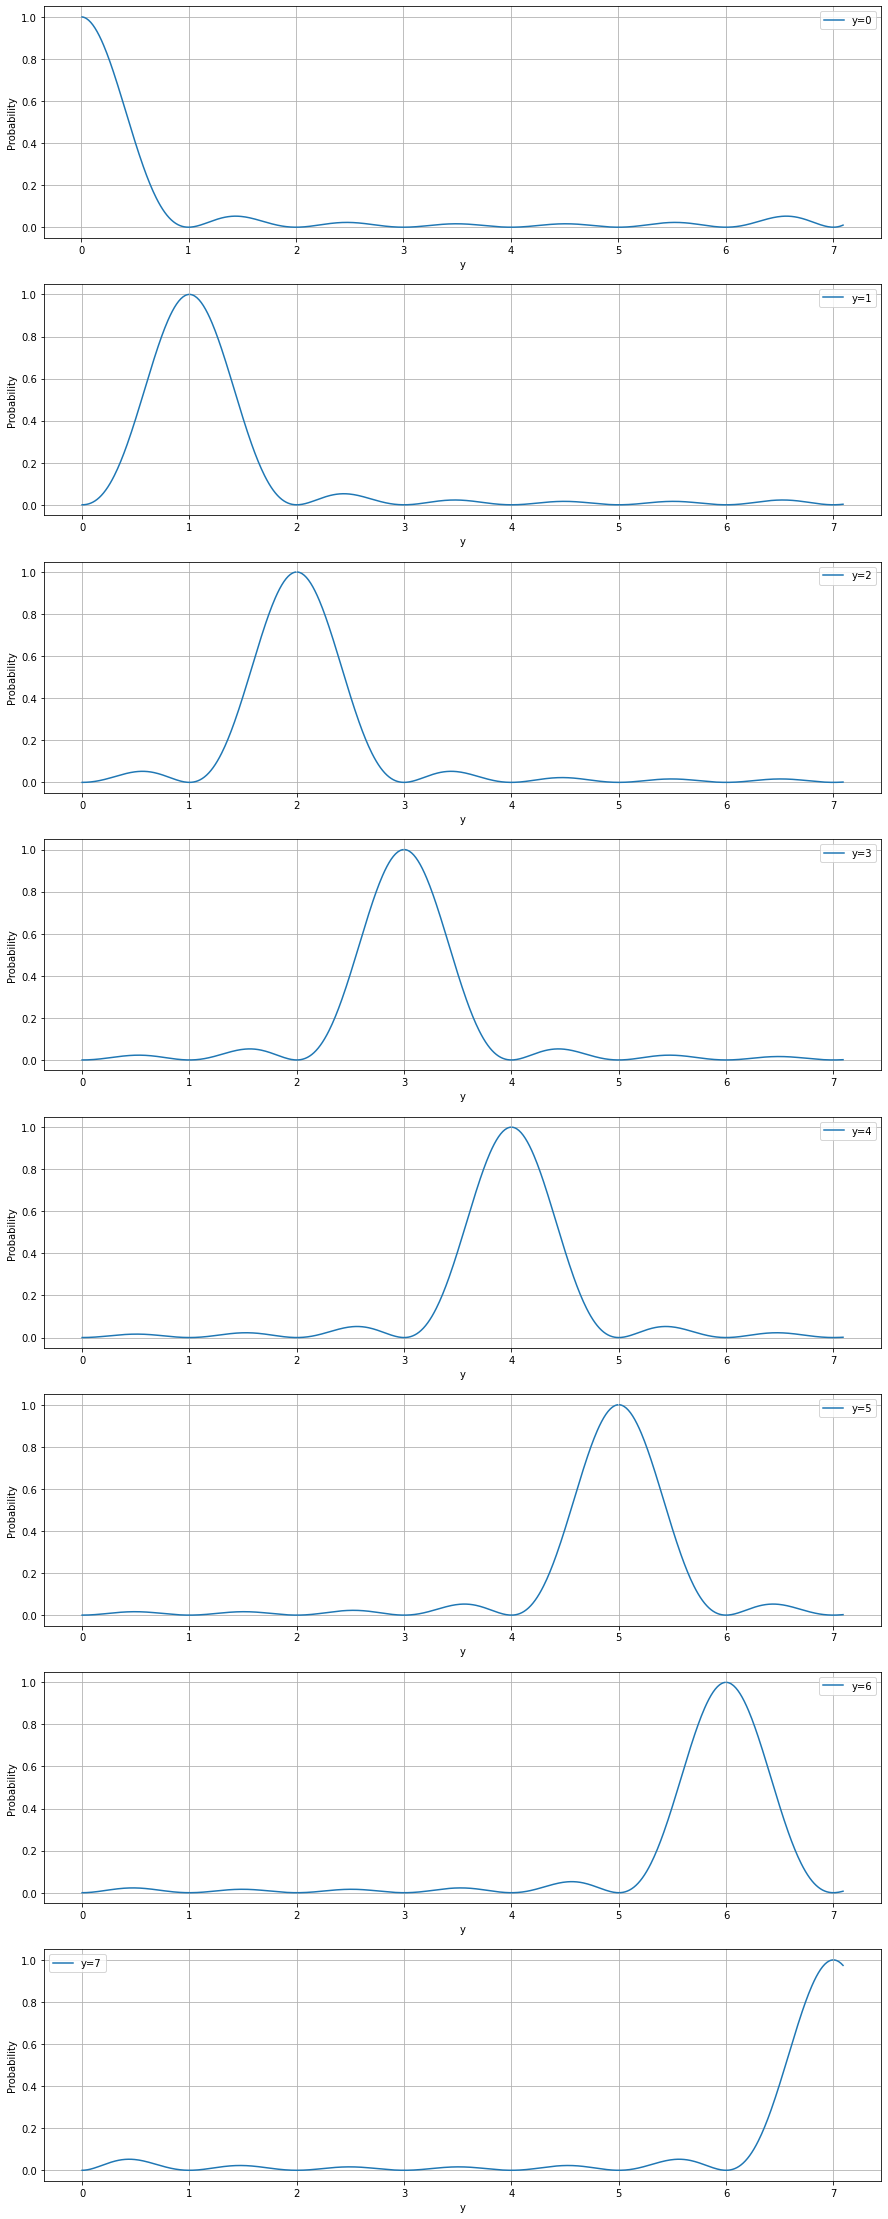

In [2]:
#plotting for basic case (single eigenstate)

import numpy as np
t=3
theta = np.arange(0, 2*np.pi, np.pi/4)
y=np.arange(0,7.1,0.01) 
AX = ['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']

f = plt.figure(figsize=(15,40))
for j in range(len(theta)):
    x=[]
    for i in range(len(y)):
        x.append(P(t, theta[j], y[i]))
    AX[j] =  f.add_subplot(8,1,j+1)
    
    plt.grid()
    plt.xlabel("y")
    plt.ylabel("Probability") 
    
    AX[j].plot(y, x)
    plt.legend(['y={0}'.format(j)])


### General Case

Now for general case where $|\psi_k\rangle = \sum_{k}a_k|\psi_k\rangle$ is a superposition of a number of states we will derive the expressions as before.
Here, 
\begin{equation}
|\phi_1\rangle = \frac{1}{2^{\frac{t}{2}}}(|0\rangle+|1\rangle)^{\otimes t}\sum_{k}a_k|\psi_k\rangle=\frac{1}{2^{t / 2}} \sum_{j=0}^{2^{t}-1}|j\rangle\sum_{k}a_k|\psi_k\rangle.
\end{equation}

We know $U^j\sum_{k}a_k|\psi_k\rangle = \sum_{k}a_ke^{2\pi ij\frac{\theta_k}{2\pi}}|\psi_k\rangle$ and after applying the unitary operations we get $|\phi_2\rangle$ -
$$
|\phi_2\rangle = \frac{1}{2^{t / 2}} \sum_{j=0}^{2^{t}-1}|j\rangle\otimes U^j\sum_{k}a_k|\psi_k\rangle
$$

$$
|\phi_2\rangle = \frac{1}{2^{t / 2}} \sum_{j=0}^{2^{t}-1}|j\rangle\otimes\sum_{k}a_ke^{2\pi ij\frac{\theta_k}{2\pi}}|\psi_k\rangle
$$

Now applying IQFT as before we get:
$$
QFT^{-1}|\phi_2\rangle = |\phi_3\rangle = \frac{1}{2^{t / 2}} \sum_{j=0}^{2^{t}-1} \left(\frac{1}{2^{\frac{t}{2}}} \sum_{y=0}^{2^{t}-1} e^{-2 \pi i\frac{jy}{2^{t}}}|y\rangle \right)\otimes\sum_{k}a_ke^{2\pi ij\frac{\theta_k}{2\pi}}|\psi_k\rangle
$$

\begin{equation}
\therefore |\phi_3\rangle = \frac{1}{2^{t}} \sum_{j=0}^{2^{t}-1} \left(\sum_{y=0}^{2^{t}-1} e^{-2 \pi i\frac{jy}{2^{t}}}|y\rangle \right)\otimes\sum_{k}a_ke^{2\pi ij\frac{\theta_k}{2\pi}}|\psi_k\rangle
\end{equation} \\\\

This $|\phi_3\rangle$ is the final state of the system. Now probability of getting a certain state $|y_0\rangle$ is 

$$
Pr(y_0) = |\langle y_0|\phi_2\rangle|^2 = \langle\phi_2|y_0\rangle \langle y_0|\phi_2\rangle
$$

$$
Pr(y_0) = (\frac{1}{2^{t}})^2 \sum_{j^{\prime}=0}^{2^{t}-1} \left(\sum_{y=0}^{2^{t}-1} e^{2 \pi i\frac{j^{\prime}y}{2^{t}}}\langle y|y_0\rangle \right)\sum_{k^{\prime}}a_{k^{\prime}}e^{-2\pi ij^{\prime}\frac{\theta_k^{\prime}}{2\pi}}\langle\psi_{k^{\prime}}| \sum_{j=0}^{2^{t}-1} \left(\sum_{y=0}^{2^{t}-1} e^{-2 \pi i\frac{jy}{2^{t}}}\langle y|y_0\rangle \right)\sum_{k}a_ke^{2\pi ij\frac{\theta_k}{2\pi}}|\psi_k\rangle
$$\\

$$
Pr(y_0) = \frac{1}{(2^{t})^2} \sum_{j^{\prime}=0}^{2^{t}-1} e^{2 \pi i\frac{j^{\prime}y_0}{2^{t}}} \sum_{j=0}^{2^{t}-1} e^{-2 \pi i\frac{jy_0}{2^{t}}} \sum_{k^{\prime}}a_{k^{\prime}}e^{-2\pi ij^{\prime}\frac{\theta_k^{\prime}}{2\pi}}\langle\psi_{k^{\prime}}| \sum_{k}a_ke^{2\pi ij\frac{\theta_k}{2\pi}}|\psi_k\rangle
$$\\

$$
Pr(y_0) = \frac{1}{(2^{t})^2} \sum_{j^{\prime}=0}^{2^{t}-1} e^{2 \pi i\frac{j^{\prime}y_0}{2^{t}}} \sum_{j=0}^{2^{t}-1} e^{-2 \pi i\frac{jy_0}{2^{t}}} \sum_{k^{\prime}}\sum_{k}a_k a_{k^{\prime}}e^{-2\pi ij^{\prime}\frac{\theta_{k^{\prime}}}{2\pi}}e^{2\pi ij\frac{\theta_k}{2\pi}}\langle\psi_{k^{\prime}}|\psi_k\rangle
$$\\\\

Considering orthogonality of $\psi_k$ i.e. $\langle\psi_{k^{\prime}}|\psi_k\rangle = \delta_{kk^{\prime}}$ we get 

$$
Pr(y_0) = \frac{1}{(2^{t})^2} \sum_{j^{\prime}=0}^{2^{t}-1} e^{2 \pi i\frac{j^{\prime}y_0}{2^{t}}} \sum_{j=0}^{2^{t}-1} e^{-2 \pi i\frac{jy_0}{2^{t}}} \sum_{k}a_k^2 e^{-2\pi ij^{\prime}\frac{\theta_{k}}{2\pi}}e^{2\pi ij\frac{\theta_k}{2\pi}}
$$\\

$$
Pr(y_0) = \frac{1}{(2^{t})^2}\sum_{k}a_k^2 \left(\sum_{j^{\prime}=0}^{2^{t}-1} e^{2 \pi ij^{\prime}\left(\frac{y_0}{2^{t}}-\frac{\theta_{k}}{2\pi}\right)} \sum_{j=0}^{2^{t}-1} e^{-2 \pi ij\left(\frac{y_0}{2^{t}}-\frac{\theta_k}{2\pi}\right)}\right)
$$\\
$$
Pr(y_0) = \frac{1}{(2^{t})^2}\sum_{k}a_k^2 \left( \frac{e^{-2 \pi i\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)2^t}-1}{e^{-2 \pi i\left(\frac{y}{2^{t}}- \frac{\theta}{2\pi}\right)}-1}\right)^{2}
$$\\
$$
Pr(y_0) = \frac{1}{(2^{t})^2}\sum_{k}a_k^2 \left(\frac{1-\cos{\left(\frac{2 \pi2^{t}}{2^{t}}\left(y_0- \frac{\theta_k 2^{t}}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{2^{t}}\left(y_0- \frac{\theta_k 2^{t}}{2\pi}\right)\right)}}\right)
$$\\
\begin{equation}
Pr(y_0) = \frac{1}{M^2}\sum_{k}a_k^2 \left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}\right) \hspace{0.5cm} where, \hspace{0.2cm} M = 2^t
\end{equation}\\\\

This is the probability of measuring a certain $|y_0\rangle$.

### Probability Function for multiple eigenstate cases:

Now for general case where $|\psi_k\rangle = \sum_{k}a_k|\psi_k\rangle$ is a superposition of a number of states the probability of measuring a certain $|y\rangle$ is given by <br>
<br>
$$
Pr(y_0) = \frac{1}{M^2}\sum_{k}a_k^2 \left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}\right) \hspace{0.5cm} where, \hspace{0.2cm} M = 2^t
$$ 
<br>

In [3]:
def Pr(t, y, a_k, theta):    # P(y,theta) for general case (multiple eigenstate) returns total sum +  
    list=[]                  # contribution from each terms
    import numpy as np
    M=2**t
    
    for k in range(len(a_k)):
        numerator = 1 - np.cos((2*np.pi)*(y - theta[k]*M/(2*np.pi)))
        denominator = 1 - np.cos((2*np.pi/M)*(y - theta[k]*M/(2*np.pi)))
        term = (a_k[k]**2)*(numerator/denominator)
        list.append(term/M**2)
            
    return sum(list), list 


In [4]:
"""
Using the expression of general case (Checking if it matches 
with above if there is only one eigen state)
""" 
print("Probability of being in state y = 2 when theta =1.5: ", P(3, 1.5, 2)) #for basic case

t=3
y=2
a_k =[1] 
theta = [1.5]
print("Now using general case we also get: ", Pr(t, y, a_k, theta))

Probability of being in state y = 2 when theta =1.5:  0.9739596198382319
Now using general case we also get:  (0.9739596198382319, [0.9739596198382319])


<ipython-input-3-4070f12bb442>:9: RuntimeWarning: invalid value encountered in double_scalars
  term = (a_k[k]**2)*(numerator/denominator)


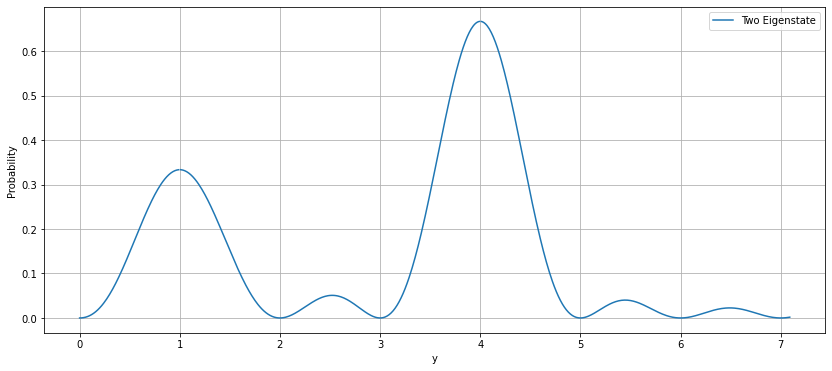

In [5]:
import numpy as np
t=3
a_k = [1/np.sqrt(3), np.sqrt(2/3)]
x=np.arange(0, 7.1, 0.01)

#create two empty lists to contain values of each term in the sum

y=[]

for j in range(len(x)):
    y.append(Pr(t, x[j], a_k, [np.pi/4 , np.pi])[0])

plt.figure(figsize=(14,6))     
plt.plot(x,y, label="Two Eigenstate")
    
plt.grid()
plt.xlabel("y")
plt.ylabel("Probability")
plt.legend()
plt.show()

## Density Matrix :
The density matrix is defined as $\rho = \sum_{i}p_i|\psi_i\rangle\langle\psi_i|$  where $\psi_i$'s are the quantum states with different probability amplitude $p_i$. However in our case there is only one state $|\phi_3\rangle$, so the density matrix is given by $\rho = |\phi_3\rangle\langle\phi_3|$. <br>  

$$\therefore \rho = |\phi_3\rangle\langle\phi_3|$$
<br> 
$$
\left( \frac{1}{M} \sum_{j=0}^{M-1} \left(\sum_{x=0}^{M-1} e^{-2 \pi i\frac{jx}{M}}|x\rangle \right)\otimes\sum_{k}a_ke^{2\pi ij\frac{\theta_k}{2\pi}}|\psi_k\rangle\right)\left(\frac{1}{M} \sum_{j^{\prime}=0}^{M-1} \left(\sum_{y=0}^{M-1} e^{2 \pi i\frac{j^{\prime}y}{M}}\langle y| \right)\otimes\sum_{k^{\prime}}a_{k^{\prime}}e^{-2\pi ij^{\prime}\frac{\theta_{k^{\prime}}}{2\pi}}\langle\psi_{k^{\prime}}| \right)
$$
<br> 

$$
=\frac{1}{M^2} \sum_{k}\sum_{k^{\prime}}a_ka_{k^{\prime}}\sum_{x=0}^{M-1}\sum_{j=0}^{M-1} e^{-2 \pi ij \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)}\sum_{y=0}^{M-1}\sum_{j^{\prime}=0}^{M-1} e^{2 \pi ij^{\prime} \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)}|x\rangle\langle y|\otimes|\psi_k\rangle \langle\psi_{k^{\prime}}|
$$
<br> 

$$
=\frac{1}{M^2} \sum_{k}\sum_{k^{\prime}}a_ka_{k^{\prime}}\left[\sum_{x=0}^{M-1}\frac{e^{-2 \pi i \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)M}-1}{e^{-2 \pi i \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)}-1}\right]\left[\sum_{y=0}^{M-1}\frac{e^{2 \pi i \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)M}-1}{e^{2 \pi i \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)}-1}\right]|x\rangle\langle y|\otimes|\psi_k\rangle \langle\psi_{k^{\prime}}|
$$
<br> 

### Incomplete density matrix function
Here is version of incomplete density matrix function :
$$
\rho = \sum_{y=0}^{M-1}\frac{1}{M^2}\sum_{k}a_k^2 \left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}\right)|y\rangle\langle y| \hspace{0.5cm} where, \hspace{0.2cm} M = 2^t
$$ 
<br>
### Steps for writing the function
<br>
<list>
<li>Change $|y\rangle$ and $\langle y|$ to computational basis form depending on the number of t qubits. For example $\langle5|$ for t=3 qubits should be $\langle 101| = $ [0,0,0,0,1,0,0,0]
<li> Write codes that transforms y to binary list form. Add extra zero to the biginning of list if list size is less than t.
<li> Write some codes that are able to perform proper tensor product. For example $\langle 101| =(0,1)\otimes(1,0)\otimes(0,1) =  [0,0,0,0,1,0,0,0]$. 
<li> Do the same for ket part (Do same as before but at last make a transpose of the matrix)
<li> Calculate the outer product $|y\rangle\langle y|$ multiplied by probability function.
<li> Calculate $\sum_{y}P(y)|y\rangle \langle y|$  
<list>

In [6]:
def Multiply(A,B):              # A,B are array, gives tensor product
    X=list(A[0]*B)              # multiply 0th term of A with all term of B and store it in X
    for i in range(1,len(A)):   
        X = X + list(A[i]*B)    # Loop concatenates/inserts next terms like 1st term of A multiplied by B in same X
    return X

def rowmatrix(y,t):           # Creates <y| bra row term, here y is integer, we create computational basis 
    import numpy as np        # same procepure as above but don't do transpose at last, this will keep row form
    x1=[]
    Zero = np.array([1,0])
    One = np.array([0,1])
    if y==0:
        x1.append(y)
    while y != 0:
        x1.append(y%2)
        y = y//2 
    while len(x1)!= t:
        x1.append(0)
            
    x1.reverse()              # x1 is list containig binary form of x
    x2 = np.array(x1)         # Now if we can do tensor product using matrices for 0 and 1 we get basis form of x
    if x2[0] == 0:            # If 0th term is 0 then begin tensor product using Multiply function
        A = Zero
        for i in range(1,len(x2)):
            if x2[i] == 0:
                A = Multiply(A,Zero)
            elif x2[i] == 1:
                A = Multiply(A,One)
        
    elif x2[0] == 1:          # If 0th term is 1 then begin tensor product using Multiply function
        A = One
        for i in range(1,len(x2)):
            if x2[i] == 0:
                A = Multiply(A,Zero)
            elif x2[i] == 1:
                A = Multiply(A,One)
    return np.matrix(A)

def columnmatrix(x,t):      # same procepure as above but do a transpose at last, this will give column form
    col_matrix = rowmatrix(x,t)
    return col_matrix.T

In [7]:
def RHO(t, a_k, theta):
    M=2**t
# Define a rho which gives back a matrix for a particular x,y () Basically gives back P(y)|y><y|
    
    def rho(x, y, t, a_k, theta):
        
        def Pr(t, y, a_k, theta):  # P(y,theta) for general case (multiple eigenstate) returns total sum +  
            List=[]                # contribution from each terms
            import numpy as np
               
            for k in range(len(a_k)):
                numerator = 1 - np.cos((2*np.pi)*(y - theta[k]*M/(2*np.pi)))
                denominator = 1 - np.cos((2*np.pi/M)*(y - theta[k]*M/(2*np.pi)))
                term = (a_k[k]**2)*(numerator/denominator)
                List.append(term/M**2)
            
            return sum(List) 
        
        return columnmatrix(x,t)*rowmatrix(y,t)*round(Pr(t, y, a_k, theta),3) # this is P(y)|x><y| does work for only P(y)|y><y|
    
    Matrix = rho(0, 0, t, a_k, theta)   # this is P(0)|0><0|
    for j in range(1, M):
        Matrix += rho(j, j, t, a_k, theta)
    return Matrix                       # this is Sum(P(y)|y><y|)
    

In [8]:
t=3
import numpy as np
a_k =[1/np.sqrt(3), np.sqrt(2)/np.sqrt(3)]
theta = [round(np.pi/4,3), round(np.pi,3)]

Now what we are doing by defining $\theta$ values in the above array is that we are fixing the phase values for testing if our density matrix will give us the correct probabilities corresponding to $|n\rangle \langle n|$ states. ${a_k}^2$ should give the probability of being in the $|n\rangle$ state (corresponding to a bitstring). For example in the above taken senario, values of $\theta$s, $\frac{\pi}{4}$ and $\pi$ correspond to state $|\frac{\frac{\pi}{4}*2^3}{2\pi}\rangle = |1\rangle$ and $|\frac{\pi*2^3}{2\pi}\rangle = |4\rangle$ attaning states with probabilities $\frac{1}{3}$ and $\frac{2}{3}$ respectively. Density matrix should be able to portray that.

In [9]:
from qiskit.visualization import array_to_latex
array_to_latex(RHO(t, a_k, theta))

<IPython.core.display.Latex object>

### Complete density matrix function
Here is the trial version of complete density matrix function :
<br> 

$$
\rho =\frac{1}{M^2} \sum_{k}\sum_{k^{\prime}}a_ka_{k^{\prime}}\left[\sum_{x=0}^{M-1}\frac{e^{-2 \pi i \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)M}-1}{e^{-2 \pi i \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)}-1}\right]\left[\sum_{y=0}^{M-1}\frac{e^{2 \pi i \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)M}-1}{e^{2 \pi i \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)}-1}\right]|x\rangle\langle y|
$$
<br> 

In [10]:
def RHO_C(t, a_k, theta):
    M=2**t
    # Define a rho which gives back a matrix for a particular x,y () Basically gives back P(y)|y><y|
    
    def rho(x, y, t, a_k, theta):
        
        def Pr(t, y, a_k, theta):         # P(y,theta) for general case (multiple eigenstate) returns total sum +  
            List=[]                       # contribution from each terms
            import numpy as np
               
            for k in range(len(a_k)):
                numerator = 1 - np.cos((2*np.pi)*(y - theta[k]*M/(2*np.pi)))
                denominator = 1 - np.cos((2*np.pi/M)*(y - theta[k]*M/(2*np.pi)))
                term = (a_k[k]**2)*(numerator/denominator)
                List.append(term/M**2)
            return sum(List)
        
        def Gr(t, x, y, a_k, theta):         # P(y,theta) for general case (multiple eigenstate) returns total sum +  
            List=[]                       # contribution from each terms
            import numpy as np
            import cmath   
            z = 0+1j
            for k in range(len(a_k)):
                a = a_k[k]
                term1 = (np.exp(-2*np.pi*z*(x - theta[k]*M/(2*np.pi)))-1)/((np.exp(-2*np.pi*z*(x - theta[k]*M/(2*np.pi)/M))-1))
                for k_prime in range(len(a_k)):
                    term2 = a*a_k[k_prime]*term1*(np.exp(2*np.pi*z*(y - theta[k_prime]*M/(2*np.pi)))-1)/((np.exp(2*np.pi*z*(y - theta[k_prime]*M/(2*np.pi))/M))-1)
                
                    List.append(term2/M**2)
            num = sum(List)
            Output = round(num.real, 2) + round(num.imag, 2) * 1j
            return Output
    
 
        if x==y:
            return columnmatrix(x,t)*rowmatrix(y,t)*complex(round(Pr(t, y, a_k, theta),2),0) # this is P(y)|x><y| does work for only P(y)|y><y|
        else:
             return columnmatrix(x,t)*rowmatrix(y,t)*Gr(t, x, y, a_k, theta)
            
    Matrix = np.matrix(np.zeros([M,M], dtype=complex))   # Initiate zero matrix
    for j in range(0, M):
        for l in range(0, M):
            Matrix += rho(l, j, t, a_k, theta)
    
    return Matrix     # this is Sum(P(x,y)|x><y|)
    

In [11]:
array_to_latex(RHO_C(t, a_k, theta))
              

<IPython.core.display.Latex object>

We had made our function such that it can accommodate any number of qubits. For example if we use $t = 4$ qubits in the phase estimation register, we will have $2^4 \times 2^4$ matrix. In next taken senario, values of $\theta$s, $\frac{\pi}{4}$ and $\pi$ correspond to state $|\frac{\frac{\pi}{4}*2^4}{2\pi}\rangle = |2\rangle$ and $|\frac{\frac{7*\pi}{4}*2^4}{2\pi}\rangle = |14\rangle$ attaning states with probabilities $\frac{1}{2}$ and $\frac{1}{2}$ respectively. Density matrix should be able to portray that too.

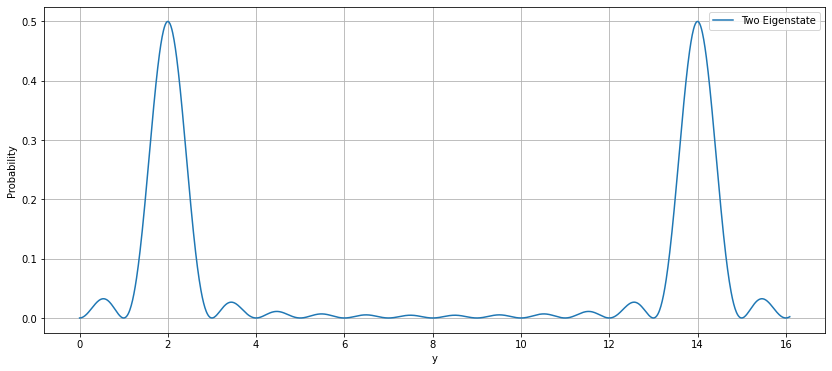

In [12]:
t=4
a_k = [1/np.sqrt(2), np.sqrt(1/2)]
new_x = np.arange(0, 16.1, 0.01)
theta_arb = [round(np.pi/4,3), round(7*np.pi/4,3)]
#create two empty lists to contain values of each term in the sum

new_y=[]

for j in range(len(new_x)):
    new_y.append(Pr(t, new_x[j], a_k, theta_arb)[0])
plt.figure(figsize=(14,6))    
plt.plot(new_x, new_y, label="Two Eigenstate")
    
plt.grid()
plt.xlabel("y")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [13]:
array_to_latex(RHO_C(4, a_k, theta_arb))

<IPython.core.display.Latex object>

### QPE using Qiskit 

Since we are done with most of the theories and made most of the portrayals, now it is simply left to simulate quantum circuit for estimating phase. We use Qiskit SDK and simulators to execute quantum phase estimation circuit.  

In [14]:
from qiskit import QuantumCircuit, Aer, execute, transpile
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from math import gcd

from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.quantum_info.operators import Operator, Pauli

In [15]:
"""-------------Quantum Fourier Transform---------------"""

def qft(phase_register_size):
    """Creates an n-qubit QFT circuit"""
    n = phase_register_size
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit


In [16]:
"""-------------Inverse Quantum Fourier Transform---------------"""

def qft_dagger(circuit, phase_register_size):
    """n-qubit QFTdagger the first n qubits in circ"""
    n = phase_register_size
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circuit.cp(-np.pi/float(2**(j-m)), m, j)
        circuit.h(j)
    return circuit


In [17]:
"""-------------Quantum Phase Estimation--------------"""

def qpe_circuit(register_size, angle):
    # Your code goes here
    
    phase_register_size = register_size
    qpe = QuantumCircuit(phase_register_size+1, phase_register_size)

    # Apply H-Gates to counting qubits:
    for qubit in range(phase_register_size):
        qpe.h(qubit)

    # Prepare our eigenstate |psi>:
    qpe.x(phase_register_size)

    # Do the controlled-U operations:
    angle = 2*np.pi*angle
    repetitions = 1
    for counting_qubit in range(phase_register_size):
        for i in range(repetitions):
            qpe.cp(angle, counting_qubit, phase_register_size);
        repetitions *= 2

    qpe.barrier()

    qft_dagger(qpe, phase_register_size)

    for n in range(phase_register_size):
        qpe.measure(n,n)
        
    return qpe

E:\Anaconda\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


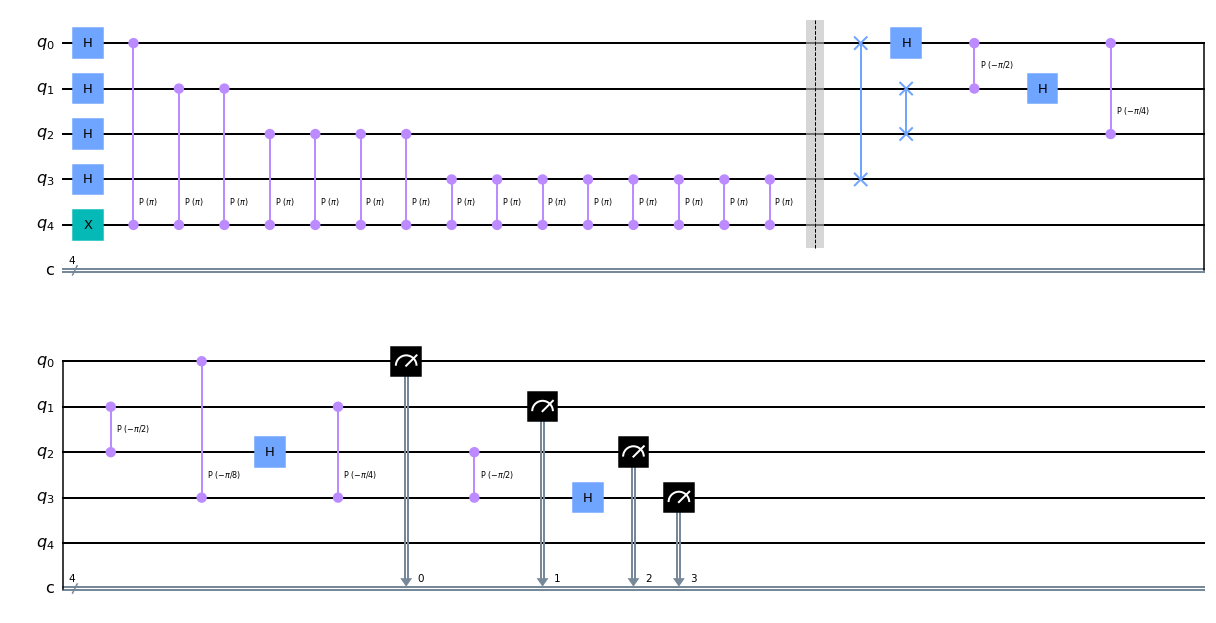

In [18]:
qpe_circuit(register_size = 4, angle = 0.5).draw("mpl")

In [19]:
def measure_output(qc, num_qubits):
    
    """If you do not want to measure all qubits you can define your own
    """
    from qiskit import QuantumCircuit, Aer, transpile, assemble
    from qiskit.providers.aer import QasmSimulator
    from qiskit.visualization import plot_histogram

    simulator = Aer.get_backend('aer_simulator')
    #compiled_circuit = transpile(qc, simulator)
    job = execute(qc, simulator, shots=1000)
    result = job.result()
    counts = result.get_counts(qc)
    return counts


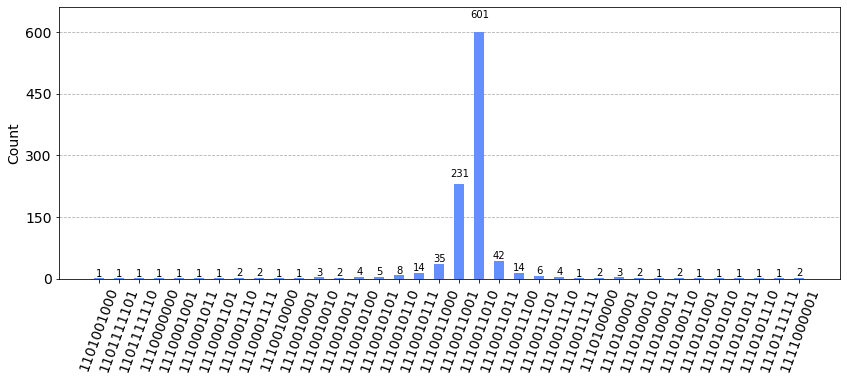

In [20]:
reg_size = 10
qpe_check = qpe_circuit(reg_size, 0.9)
counts = measure_output(qpe_check, reg_size)
plot_histogram(counts, figsize=(14, 5))


After completing the measurements we will have all measurement senarios, we need to extract the the bitstring that has most number of counts.

In [21]:
def convert_measure_output(counts):
    
    """Converts the bitstring that has been counted highest (among all possible values) to decimal value.
    Change the last loop if you want something different.
    Here it returns 0 <= value <= 1
    """
    def binary_to_decimal(y):
        x=0
        for i in range(len(y)):
            x=x+int(y[i])/2**(i+1)
        return x
    
    max_binary_counts = 0
    max_binary_val = ''
    for key, item in counts.items():
        if item > max_binary_counts:
            max_binary_counts = item
            max_binary_val = key
            
    max_val = max_binary_val        
    return binary_to_decimal(max_val)
   
    

In [22]:
convert_measure_output(counts)

0.900390625

In [23]:
test_y = np.arange(0, 7, 0.2)
angle = [test_y[i]/8 for i in range(len(test_y))]
Y_plot=[]
for i in range(len(test_y)):
    reg_size = 12
    qpe_check = qpe_circuit(reg_size, angle[i])
    count_value = measure_output(qpe_check, reg_size)
    count_value = convert_measure_output(count_value)
    print("Against original angle value of {angle}, output of QPE Circuit is {value}".format(angle = round(angle[i],5),value = round(count_value,5)))
    print()

Against original angle value of 0.0, output of QPE Circuit is 0.0

Against original angle value of 0.025, output of QPE Circuit is 0.0249

Against original angle value of 0.05, output of QPE Circuit is 0.05005

Against original angle value of 0.075, output of QPE Circuit is 0.07495

Against original angle value of 0.1, output of QPE Circuit is 0.1001

Against original angle value of 0.125, output of QPE Circuit is 0.125

Against original angle value of 0.15, output of QPE Circuit is 0.1499

Against original angle value of 0.175, output of QPE Circuit is 0.17505

Against original angle value of 0.2, output of QPE Circuit is 0.19995

Against original angle value of 0.225, output of QPE Circuit is 0.2251

Against original angle value of 0.25, output of QPE Circuit is 0.25

Against original angle value of 0.275, output of QPE Circuit is 0.2749

Against original angle value of 0.3, output of QPE Circuit is 0.30005

Against original angle value of 0.325, output of QPE Circuit is 0.32495

Aga